<a href="https://colab.research.google.com/github/arifpras/BelutListrik/blob/main/20250622_fpl_all_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Import the drive module from google.colab so we can access Google Drive

drive.mount('/content/drive')   # Mount (connect) your Google Drive to the path /content/drive so files can be accessed

Mounted at /content/drive


In [1]:
setwd("/content/drive/MyDrive/02all")  # Set the working directory to the specified folder in your Google Drive

getwd()                                # Show the current working directory to confirm the change

[1] "/content/drive/MyDrive/02all"

In [2]:
library(readr)   # Load the 'readr' package, which provides functions to read data (like CSV files)

library(dplyr)   # Load the 'dplyr' package, useful for data manipulation (filtering, selecting, grouping, etc.)

db00 <- read_csv("/content/drive/MyDrive/00fpl/db00all_fpl.csv", show_col_types = FALSE)
# Read the CSV file from your Google Drive into a data frame called 'db00'
# 'show_col_types = FALSE' hides the column type message

# db00 <- read_csv("https://raw.githubusercontent.com/arifpras/tfda-djppr/refs/heads/main/courses/workshop01/db00all_fpl.csv", show_col_types = FALSE)
# (Optional alternative) Load the same CSV file directly from a GitHub URL instead of Google Drive


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
glimpse(db00)  # Quickly display the structure of the 'db00' data frame: column names, types, and example values

Rows: 64,661
Columns: 40
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ x_p                        <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [4]:
important_vars <- c(
  "name", "total_points", "team", "creativity",
  "influence", "minutes", "selected", "starts", "threat",
  "transfers_balance", "value"
)
# Define a list of important columns to keep from the dataset

db01 <- db00 %>%
  select(all_of(important_vars)) %>%              # Keep only the specified columns from db00
  filter(minutes != 0, value >= 36) %>%  # Keep only players with non-zero minutes and have value >= 36
  mutate(value = value / 10) %>%                  # Convert player value to original scale (e.g., 100 → 10.0)
  relocate(total_points)                          # Move 'total_points' column to the front
# Create a new filtered and cleaned dataset called db01

glimpse(db01)  # Display the structure of db01: column names, types, and example values

Rows: 20,817
Columns: 11
$ total_points      <dbl> 1, 2, 1, 1, 2, 2, 4, 2, 3, 8, 7, 1, 3, 1, 2, 2, 6, 1…
$ name              <chr> "Jadon Sancho", "Vitaly Janelt", "Andre Brooks", "Cu…
$ team              <chr> "Man Utd", "Brentford", "Sheffield Utd", "Liverpool"…
$ creativity        <dbl> 11.3, 11.5, 0.0, 1.8, 35.9, 0.0, 20.5, 0.0, 8.6, 5.9…
$ influence         <dbl> 3.8, 14.6, 0.0, 4.6, 11.4, 0.0, 19.2, 0.0, 2.2, 30.2…
$ minutes           <dbl> 22, 90, 3, 24, 75, 86, 10, 90, 90, 72, 89, 3, 62, 23…
$ selected          <dbl> 83993, 6508, 0, 11655, 1339493, 2319, 43975, 2002, 4…
$ starts            <dbl> 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1…
$ threat            <dbl> 8, 17, 0, 0, 3, 0, 2, 0, 0, 36, 23, 4, 9, 7, 2, 8, 0…
$ transfers_balance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ value             <dbl> 7.0, 5.5, 4.5, 5.0, 5.5, 5.0, 5.0, 5.0, 6.5, 5.5, 5.…


In [5]:
db01 %>% head()  # Show the first 6 rows of the cleaned dataset 'db01' to get a quick look at the data

total_points,name,team,creativity,influence,minutes,selected,starts,threat,transfers_balance,value
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jadon Sancho,Man Utd,11.3,3.8,22,83993,0,8,0,7.0
2,Vitaly Janelt,Brentford,11.5,14.6,90,6508,1,17,0,5.5
1,Andre Brooks,Sheffield Utd,0.0,0.0,3,0,0,0,0,4.5
1,Curtis Jones,Liverpool,1.8,4.6,24,11655,0,0,0,5.0
2,Reece James,Chelsea,35.9,11.4,75,1339493,1,3,0,5.5
2,Ben Osborn,Sheffield Utd,0.0,0.0,86,2319,1,0,0,5.0


In [7]:
db01 %>%
  arrange(desc(total_points)) %>%                     # Sort the players from highest to lowest total points
  select(name, team, value, total_points)   # Select only key columns to display: name, team, position, value, and total points

name,team,value,total_points
<chr>,<chr>,<dbl>,<dbl>
Cole Palmer,Chelsea,6.1,26
Ollie Watkins,Aston Villa,7.9,23
Kevin Schade,Brentford,5.1,23
Jérémy Doku,Man City,6.5,22
Justin Kluivert,Bournemouth,5.5,22
Conor Bradley,Liverpool,4.0,21
Erling Haaland,Man City,14.1,21
Joško Gvardiol,Man City,5.1,21
Mohamed Salah,Liverpool,13.4,21


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



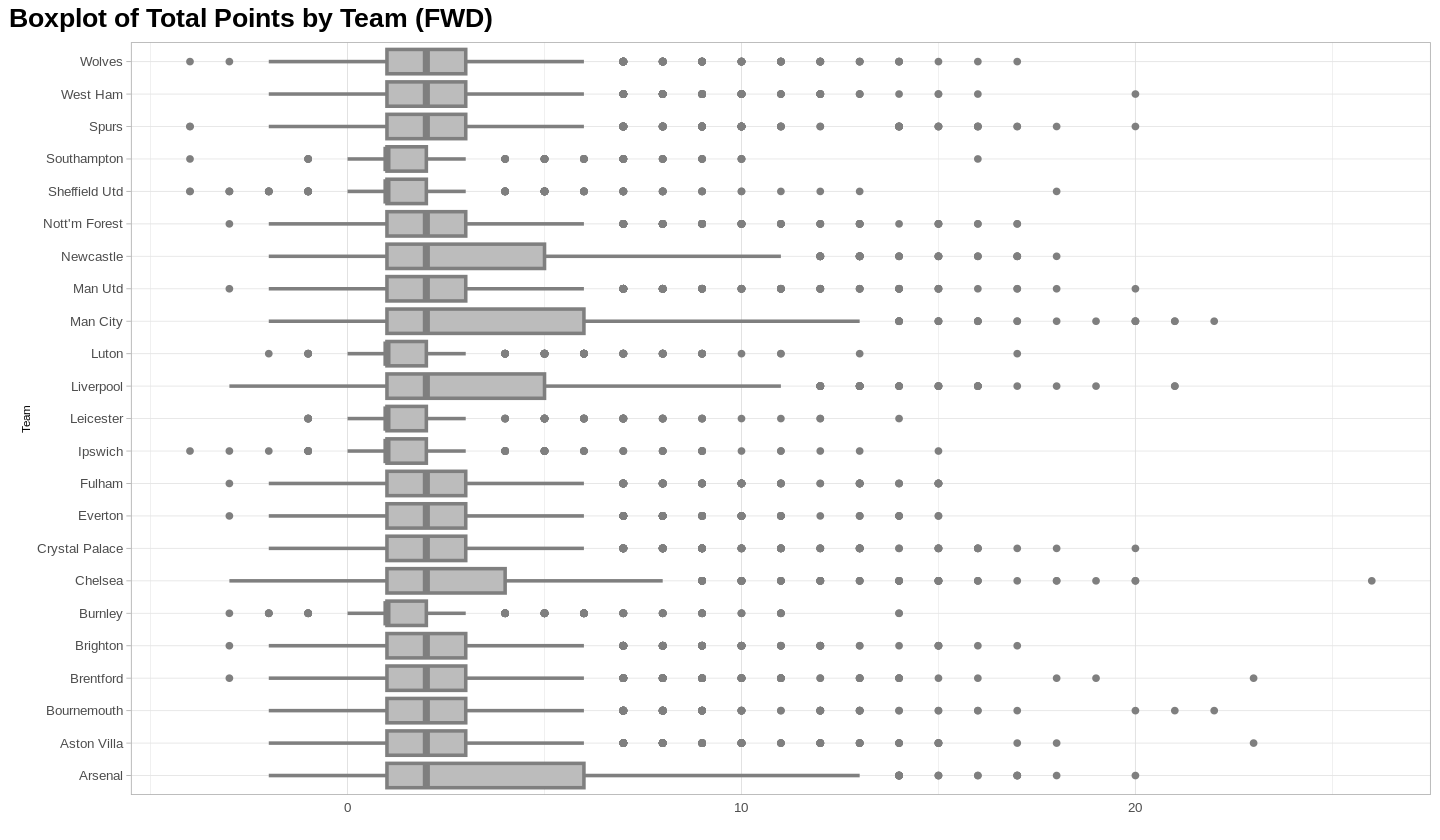

In [8]:
install.packages("colorspace")  # (Run once if not yet installed) Installs the 'colorspace' package for color customization

library(ggplot2)     # Load ggplot2 for plotting
library(colorspace)  # Load colorspace for advanced color manipulation
library(dplyr)       # Load dplyr for data manipulation

# Filter and plot
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

db01 %>%
  select(-name) %>%  # Exclude the 'name' column to simplify the plot
  ggplot(aes(x = team, y = total_points)) +  # Start a ggplot: team on x-axis (flipped later), total points on y-axis
  geom_boxplot(
    aes(
      fill = after_scale(desaturate(lighten(color, 0.7), 0.7))  # Use a lightened and desaturated version of the default fill color
    ),
    size = 1,      # Thickness of boxplot lines
    color = "grey50"  # Border color of boxplots
  ) +
  scale_fill_manual(values = NULL) +  # Allow manual fill scale (required when using after_scale, even if NULL)
  # facet_wrap(~ obsvar, scales = "free", nrow = 1) +  # (Optional) Facet if you'd like to split by another variable
  theme_light() +  # Use a clean light theme
  labs(
    title = "Boxplot of Total Points by Team (FWD)",  # Plot title
    x = "\nTeam",  # X-axis label
    y = "",        # No Y-axis label
    color = NULL   # No legend title
  ) +
  coord_flip() +  # Flip the coordinates to make team names readable (horizontal boxplots)
  theme(
    axis.text.x = element_text(size = 8),           # Customize x-axis text size
    axis.ticks.x = element_blank(),                 # Remove x-axis ticks
    axis.line.x = element_blank(),                  # Remove x-axis lines
    axis.title.x = element_text(size = 7),          # X-axis title size
    axis.text.y = element_text(size = 8),           # Y-axis (team names) text size
    axis.title.y = element_text(size = 7),          # Y-axis title size
    axis.line.y = element_blank(),                  # Remove y-axis lines
    plot.title = element_text(hjust = 0, size = 16, face = "bold"),  # Title aligned left, bold, larger size
    plot.title.position = "plot",                   # Title position
    strip.text.x = element_text(size = 8),          # Facet strip label size (if faceting)
    panel.grid.major.y = element_line(color = "grey90"),  # Light gridlines for readability
    panel.spacing = unit(1, "lines"),               # Spacing between facets (if used)
    legend.position = "none"                        # Hide legend
  )

How to Interpret the Plot:
- Each boxplot shows the distribution of total points scored by forwards (FWD) in each team.
- The thicker box represents the interquartile range (IQR), where the middle 50% of players fall.
- The line inside the box is the median — it shows the typical forward’s point output for that team.
- Longer whiskers or outliers indicate more variability or standout performers.
- Teams with higher boxes and medians generally have better-performing forwards.
- If a team has a short box with no outliers, it means their forwards perform consistently, but not necessarily well.

In [11]:
db01 %>%
  group_by(team) %>%  # Group the data by 'team'

  summarise(
    count_players = n(),                                    # Number of forwards in each team
    min_points = min(total_points, na.rm = TRUE),           # Minimum total points
    q1 = quantile(total_points, 0.25, na.rm = TRUE),        # 25th percentile (Q1)
    q2_median = median(total_points, na.rm = TRUE),         # Median (Q2)
    q3 = quantile(total_points, 0.75, na.rm = TRUE),        # 75th percentile (Q3)
    # q4 = max(total_points, na.rm = TRUE),                   # Maximum value (same as max_points, redundant here)
    max_points = max(total_points, na.rm = TRUE),           # Maximum total points (repeated for clarity)
    mean_points = mean(total_points, na.rm = TRUE),         # Mean total points
    value_weighted_avg = weighted.mean(total_points, w = value, na.rm = TRUE)  # Value-weighted average of total points
  ) %>%
  arrange(desc(value_weighted_avg))  # Sort the results by median total points (highest team medians first)

team,count_players,min_points,q1,q2_median,q3,max_points,mean_points,value_weighted_avg
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Man City,980,-2,1,2,6,22,3.630612,3.952347
Arsenal,1029,-2,1,2,6,20,3.657920,3.792961
Liverpool,1062,-3,1,2,5,21,3.388889,3.786719
Newcastle,1040,-2,1,2,5,18,3.223077,3.372023
Chelsea,1016,-3,1,2,4,26,3.030512,3.154855
Aston Villa,1047,-2,1,2,3,23,2.850048,2.990885
Crystal Palace,1008,-2,1,2,3,20,2.897817,2.970824
Spurs,1058,-4,1,2,3,20,2.728733,2.959894
Brentford,1046,-3,1,2,3,23,2.717973,2.841338


In [12]:
install.packages("stargazer")  # (Run once) Install the 'stargazer' package for beautiful summary tables

library(stargazer)  # Load the stargazer package

db01 %>%
  as.data.frame() %>%                            # Convert tibble to standard data frame (stargazer prefers base data frames)
  stargazer(type = 'text',                      # Output the summary as plain text (other options: 'html', 'latex')
            out = "descsumm01_all.txt",         # Save the summary output to a text file named "descsumm01_fwd.txt"
            digits = 1)                         # Round all numeric summaries to 1 decimal place

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic           N      Mean    St. Dev.     Min        Max   
-----------------------------------------------------------------
total_points      20,817    2.7       3.0        -4        26    
creativity        20,817   10.4      14.1       0.0       135.1  
influence         20,817   15.3      15.4       0.0       142.6  
minutes           20,817   65.3      31.7        1         90    
selected          20,817 438,833.8 928,111.6     0      9,241,818
starts            20,817    0.7       0.4        0          1    
threat            20,817    9.5      14.8        0         144   
transfers_balance 20,817 10,881.2  97,409.3  -1,284,774 1,674,116
value             20,817    5.2       1.2       3.6       15.4   
-----------------------------------------------------------------


In [13]:
install.packages("parameters")  # (Run once) Install the 'parameters' package to compute advanced descriptive statistics

library(dplyr)       # Load dplyr for data manipulation
library(parameters)  # Load parameters for descriptive summary functions

# Get the summary as a data frame
descsumm02 <- db01 %>%
  select(where(is.numeric)) %>%      # Select only numeric columns from db01
  describe_distribution()            # Generate descriptive stats (mean, SD, skewness, kurtosis, etc.)

descsumm02  # View the summary table

# Save it as plain text
capture.output(
  print(descsumm02, digits = 1),     # Format the output with 1 decimal precision
  file = "descsumm02_all.txt"        # Save the printed summary to a file named "descsumm02_fwd.txt"
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’




Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
total_points,2.739684e+00,2.968176e+00,2.0,-4.0,26.0,2.0574916,5.0726227,20817,0
creativity,1.035188e+01,1.409477e+01,14.3,0.0,135.1,2.2249719,6.8335068,20817,0
influence,1.526196e+01,1.535715e+01,17.6,0.0,142.6,1.7742839,4.7814544,20817,0
minutes,6.529500e+01,3.166950e+01,52.5,1.0,90.0,-0.8932602,-0.8342450,20817,0
selected,4.388338e+05,9.281116e+05,394600.0,0.0,9241818.0,4.1882878,22.7140680,20817,0
starts,7.292117e-01,4.443776e-01,1.0,0.0,1.0,-1.0317069,-0.9356709,20817,0
threat,9.537445e+00,1.478899e+01,13.0,0.0,144.0,2.4602861,7.6975714,20817,0
transfers_balance,1.088124e+04,9.740926e+04,5472.0,-1284774.0,1674116.0,3.5460734,46.5295113,20817,0
value,5.225349e+00,1.219952e+00,1.0,3.6,15.4,3.1310670,15.5416489,20817,0


In [14]:
install.packages("corrr")  # (Run once) Install the 'corrr' package to compute and format correlation matrices

library(corrr)  # Load the corrr package

corr01 <- db01 %>%
  select(where(is.numeric)) %>%  # Keep only numeric columns from db01
  correlate() %>%                # Compute pairwise correlations between all numeric variables
  # shave() %>%                 # (Optional) Remove the upper triangle of the correlation matrix
  fashion()                     # Format the correlation matrix for cleaner display (aligns numbers, adds spacing)

corr01  # Display the formatted correlation table

# Save the output as a plain text file
capture.output(print(corr01), file = "corr01_all.txt")  # Write the result to "corr01_fwd.txt"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,total_points,creativity,influence,minutes,selected,starts,threat,transfers_balance,value
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
total_points,,.29,.76,.32,.23,.29,.50,.09,.24
creativity,.29,,.32,.28,.19,.26,.32,.10,.31
influence,.76,.32,,.46,.21,.39,.46,.08,.13
minutes,.32,.28,.46,,.22,.91,.21,.09,.05
selected,.23,.19,.21,.22,,.20,.28,.21,.63
starts,.29,.26,.39,.91,.20,,.20,.09,.06
threat,.50,.32,.46,.21,.28,.20,,.12,.43
transfers_balance,.09,.10,.08,.09,.21,.09,.12,,.10
value,.24,.31,.13,.05,.63,.06,.43,.10,


In [15]:
db01 %>%
  select(where(is.numeric)) %>%         # Select only numeric columns from db01
  correlate() %>%                        # Compute pairwise correlations between numeric variables
  as.data.frame() %>%                    # Convert the correlation matrix to a regular data frame
  write.csv("corr01_all.csv", row.names = FALSE)  # Save it as a CSV file without row names

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


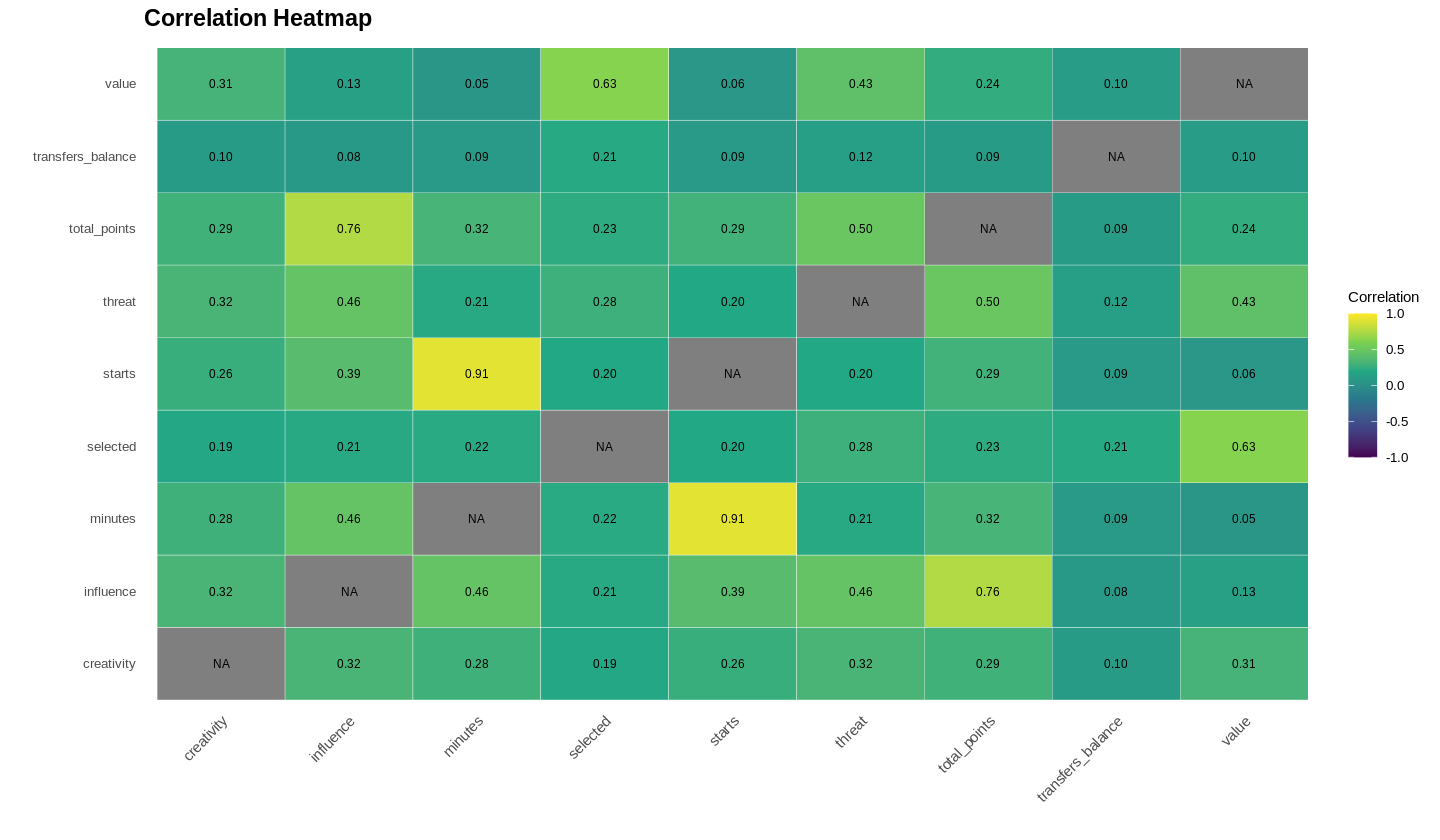

In [16]:
install.packages("viridis")  # (Run once) Install the 'viridis' package for colorblind-friendly color scales

library(corrr)     # For calculating correlations
library(dplyr)     # For data manipulation
library(tidyr)     # For reshaping data
library(ggplot2)   # For plotting
library(viridis)   # For advanced color palettes (colorblind-friendly)

# Step 1: Compute correlations
corr_matrix <- db01 %>%
  select(where(is.numeric)) %>%  # Select only numeric columns
  correlate()                    # Compute correlation matrix

# Step 2: Reshape to long format (for ggplot heatmap)
corr_long <- corr_matrix %>%
  pivot_longer(-term, names_to = "variable", values_to = "correlation")  # Convert wide matrix to long format

# Step 3: Create heatmap plot object
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

corr_plot <- ggplot(corr_long, aes(x = term, y = variable, fill = correlation)) +
  geom_tile(color = "white") +                                   # Create colored squares for each correlation
  geom_text(aes(label = sprintf("%.2f", correlation)), size = 2.5, color = "black") +  # Show correlation with exactly two decimals
  scale_fill_viridis_c(option = "D", limits = c(-1, 1), name = "Correlation") +  # Apply viridis color scale from -1 to 1
  # coord_fixed() +                                                # Fix aspect ratio for square tiles
  theme_minimal() +                                              # Use a clean minimal theme
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),  # Rotate x-axis labels for readability
    axis.text.y = element_text(size = 8),
    panel.grid = element_blank(),
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 8)
  ) +
  labs(title = "Correlation Heatmap", x = "", y = "")  # Set title and remove axis labels

corr_plot  # Display the heatmap in the notebook

# Step 4: Save to PDF
ggsave("heatmap01_all.pdf", plot = corr_plot, width = 11.7, height = 8.3, dpi = 300)  # Export the plot to a landscape A4 PDF

In [18]:
# library(tidyverse)  # (Optional) Load the full tidyverse suite if needed
library(tidyr)        # Load tidyr for data reshaping functions like pivot_longer()

db02 <- db01 %>%
  select(-name) %>%                  # Remove the 'name' column to simplify the reshaped data
  relocate(team) %>%      # Move 'team' and 'position' columns to the front
  pivot_longer(                     # Reshape the data from wide to long format:
    cols = total_points:value,      # Convert all columns from 'total_points' to 'value' into key-value pairs
    names_to = "obsvar",            # Store original column names in a new column called 'obsvar'
    values_to = "obsval"            # Store the corresponding values in a column called 'obsval'
  )

glimpse(db02)  # Display the structure of the reshaped dataset

Rows: 187,353
Columns: 3
$ team   <chr> "Man Utd", "Man Utd", "Man Utd", "Man Utd", "Man Utd", "Man Utd…
$ obsvar <chr> "total_points", "creativity", "influence", "minutes", "selected…
$ obsval <dbl> 1.0, 11.3, 3.8, 22.0, 83993.0, 0.0, 8.0, 0.0, 7.0, 2.0, 11.5, 1…


In [19]:
# important_vars <- c(
#   "name", "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
#   "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
#   "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
#   "influence", "minutes", "own_goals", "penalties_missed",
#   "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
#   "team_h_score", "threat", "transfers_balance", "value"
# )

important_vars <- c(
  "total_points", "team", "creativity",
  "influence", "minutes", "selected", "starts",
  "threat", "transfers_balance", "value"
)
# Define a list of important variables (column names) to include in the new dataset

db03 <- db01 %>%
  select(all_of(important_vars)) %>%  # Select only the specified variables from db01
  relocate(total_points)              # Move 'total_points' column to the front for easier reference

glimpse(db03)  # Display the structure of the new dataset (column types and example values)

Rows: 20,817
Columns: 10
$ total_points      <dbl> 1, 2, 1, 1, 2, 2, 4, 2, 3, 8, 7, 1, 3, 1, 2, 2, 6, 1…
$ team              <chr> "Man Utd", "Brentford", "Sheffield Utd", "Liverpool"…
$ creativity        <dbl> 11.3, 11.5, 0.0, 1.8, 35.9, 0.0, 20.5, 0.0, 8.6, 5.9…
$ influence         <dbl> 3.8, 14.6, 0.0, 4.6, 11.4, 0.0, 19.2, 0.0, 2.2, 30.2…
$ minutes           <dbl> 22, 90, 3, 24, 75, 86, 10, 90, 90, 72, 89, 3, 62, 23…
$ selected          <dbl> 83993, 6508, 0, 11655, 1339493, 2319, 43975, 2002, 4…
$ starts            <dbl> 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1…
$ threat            <dbl> 8, 17, 0, 0, 3, 0, 2, 0, 0, 36, 23, 4, 9, 7, 2, 8, 0…
$ transfers_balance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ value             <dbl> 7.0, 5.5, 4.5, 5.0, 5.5, 5.0, 5.0, 5.0, 6.5, 5.5, 5.…


In [20]:
db03$team <- factor(db03$team)  # Convert the 'team' column to a factor (categorical variable)

db03$team <- relevel(db03$team, ref = "Man City")
# Set "Man City" as the reference category for the 'team' factor.
# This means all other team coefficients in the regression will be compared to "Man City"

ols_all_base <- lm(total_points ~ ., data = db03)
# Fit a linear regression model predicting total_points using all other variables in db03
# (The "." means "use all remaining columns as predictors")

# ols_fwd_robust <- lm_robust(
#   total_points ~ ., data = db03, se_type = "stata"
# )
# (Optional) Robust version using heteroskedasticity-consistent standard errors (commented out)

summary(ols_all_base)  # Print the summary of the OLS regression model

# summary(ols_fwd_robust)
# Print the robust regression summary (if using the lm_robust version)


Call:
lm(formula = total_points ~ ., data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5623 -1.0169 -0.0724  0.6820 10.6565 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9.647e-02  1.127e-01  -0.856 0.392210    
teamArsenal         3.604e-01  8.231e-02   4.378 1.20e-05 ***
teamAston Villa    -8.904e-02  8.287e-02  -1.074 0.282665    
teamBournemouth    -2.558e-01  8.375e-02  -3.054 0.002260 ** 
teamBrentford      -2.720e-01  8.359e-02  -3.254 0.001138 ** 
teamBrighton       -3.503e-01  8.289e-02  -4.227 2.38e-05 ***
teamBurnley        -5.461e-01  9.868e-02  -5.533 3.18e-08 ***
teamChelsea        -2.052e-01  8.331e-02  -2.463 0.013796 *  
teamCrystal Palace -1.022e-01  8.439e-02  -1.211 0.225855    
teamEverton        -3.921e-02  8.498e-02  -0.461 0.644497    
teamFulham         -2.549e-01  8.345e-02  -3.055 0.002256 ** 
teamIpswich        -6.796e-01  1.042e-01  -6.521 7.16e-11 ***
teamLeicester      -6.086e-01  1.0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-9



Best lambda: 0.001316418 


31 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)        -2.133113e-01
teamArsenal         4.487573e-01
teamAston Villa     3.236327e-03
teamBournemouth    -1.491191e-01
teamBrentford      -1.660901e-01
teamBrighton       -2.449137e-01
teamBurnley        -4.365447e-01
teamChelsea        -1.017868e-01
teamCrystal Palace  .           
teamEverton         5.472090e-02
teamFulham         -1.490803e-01
teamIpswich        -5.695793e-01
teamLeicester      -4.991337e-01
teamLiverpool      -1.262302e-01
teamLuton          -4.151562e-01
teamMan Utd        -3.423460e-01
teamNewcastle       1.629913e-02
teamNott'm Forest  -1.114881e-01
teamSheffield Utd  -6.818971e-01
teamSouthampton    -4.816363e-01
teamSpurs          -4.364764e-01
teamWest Ham       -3.033112e-01
teamWolves         -2.217745e-01
creativity         -1.047048e-03
influence           1.359347e-01
minutes            -1.249456e-02
selected           -8.601517e-08
starts              7.310010e-01
t

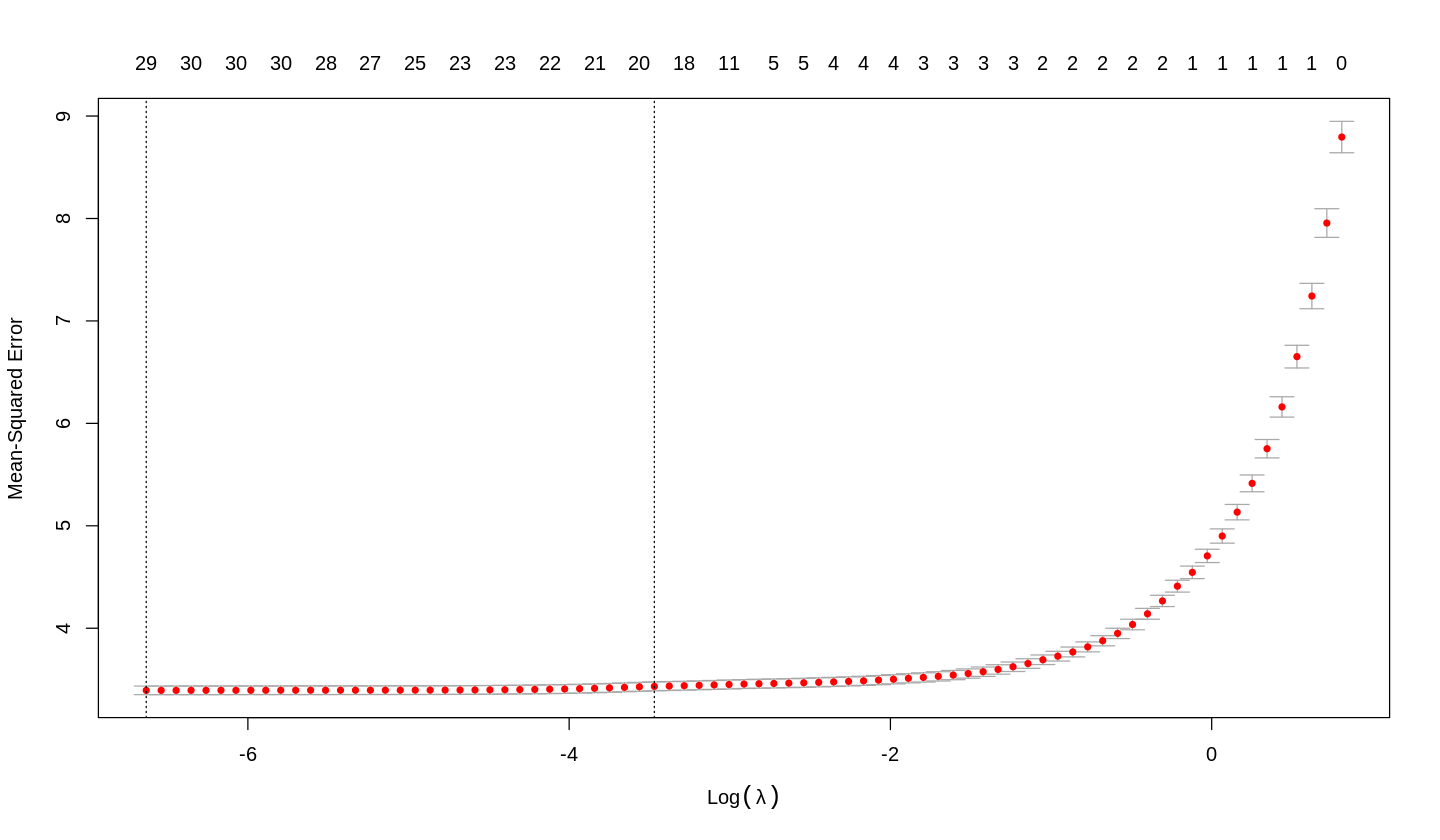

In [21]:
# Load required libraries
install.packages("glmnet")  # (Run once if not installed)
library(glmnet)  # For regularized regression like LASSO
library(dplyr)   # For data manipulation

# Prepare data
# (Uncomment and adjust if you want a custom version of db_lasso)
# db_lasso <- db01 %>%
#   select(total_points, team, x_p, assists, bonus, bps, clean_sheets, creativity,
#          expected_assists, expected_goals, goals_scored, influence,
#          minutes, own_goals, penalties_missed, selected, starts, threat,
#          transfers_balance, value) %>%
#   na.omit()  # Remove rows with missing values

# Convert categorical variable 'team' to dummy variables
x <- model.matrix(total_points ~ ., data = db03)[, -1]  # Create matrix of predictors (excluding intercept column)
y <- db03$total_points  # Target variable (total points)

# ⚙️ Fit LASSO using cross-validation
set.seed(123)  # For reproducibility
cv_fit <- cv.glmnet(x, y, alpha = 1, standardize = TRUE)
# Perform LASSO (alpha = 1) with automatic lambda tuning via cross-validation

# Optimal lambda
best_lambda <- cv_fit$lambda.min  # Best lambda minimizing mean cross-validated error
cat("Best lambda:", best_lambda, "\n")

# Plot cross-validation error curve
plot(cv_fit)  # Shows how model error changes as lambda increases

# Extract coefficients at best lambda
coef(cv_fit, s = "lambda.min")  # Show which variables are kept/shrunk

# Predict fitted values (optional)
pred <- predict(cv_fit, newx = x, s = "lambda.min")  # Make predictions using the selected lambda

What this does:

- Automatically selects the most predictive variables for total_points using LASSO regularization.
- Shrinks less important coefficients to zero — great for feature selection.
- Uses cross-validation to find the optimal penalty (lambda.min).

In [24]:
# Assuming `lasso_coef` is your sparse matrix from coef(cv_fit, s = "lambda.min")
lasso_coef <- coef(cv_fit, s = "lambda.min")
# Extract the coefficients from the best LASSO model (based on lambda.min)

# Convert to a tidy data frame
coef_all <- as.matrix(lasso_coef) %>%                  # Convert the sparse matrix to a regular matrix
  as.data.frame() %>%                                 # Convert matrix to data frame
  tibble::rownames_to_column(var = "feature") %>%     # Move row names (variable names) into a column called "feature"
  rename(coefficient = s0)                            # Rename the column holding coefficients to "coefficient"

# Optional: filter only non-zero coefficients
coef_all_nonzero <- coef_all%>%
  filter(coefficient != 0)  # Keep only the features selected by the LASSO (i.e., those with non-zero coefficients)

# View
print(coef_all_nonzero)  # Display the non-zero coefficients and their associated features

             feature   coefficient
1        (Intercept) -2.133113e-01
2        teamArsenal  4.487573e-01
3    teamAston Villa  3.236327e-03
4    teamBournemouth -1.491191e-01
5      teamBrentford -1.660901e-01
6       teamBrighton -2.449137e-01
7        teamBurnley -4.365447e-01
8        teamChelsea -1.017868e-01
9        teamEverton  5.472090e-02
10        teamFulham -1.490803e-01
11       teamIpswich -5.695793e-01
12     teamLeicester -4.991337e-01
13     teamLiverpool -1.262302e-01
14         teamLuton -4.151562e-01
15       teamMan Utd -3.423460e-01
16     teamNewcastle  1.629913e-02
17 teamNott'm Forest -1.114881e-01
18 teamSheffield Utd -6.818971e-01
19   teamSouthampton -4.816363e-01
20         teamSpurs -4.364764e-01
21      teamWest Ham -3.033112e-01
22        teamWolves -2.217745e-01
23        creativity -1.047048e-03
24         influence  1.359347e-01
25           minutes -1.249456e-02
26          selected -8.601517e-08
27            starts  7.310010e-01
28            threat

In [26]:
install.packages("estimatr")  # (Run once) Install for robust regression tools
library(estimatr)  # Load package (used if running lm_robust)

# install.packages("modelsummary")  # (Optional) Install for pretty regression tables
# library(modelsummary)  # Load modelsummary (used if you want clean tables with stars)

# 💡 Optional robust version using lm_robust (commented out)
# ols_fwd_lasso <- lm_robust(
#     total_points ~ team + assists + creativity + expected_assists + expected_goals +
#       goals_scored + influence + minutes + own_goals + penalties_missed + starts +
#       threat + transfers_balance + value, data = db03, se_type = "stata")

# Basic OLS regression using only variables selected by LASSO
ols_all_lasso <- lm(
  total_points ~ team + creativity + influence +
    minutes + selected + starts + threat + transfers_balance +
    value, data = db03)

# View summary of the model: coefficients, R², significance levels, etc.
summary(ols_all_lasso)

# (Optional) Generate a clean regression table with significance stars
# modelsummary(ols_gk_lasso, stars = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = total_points ~ team + creativity + influence + minutes + 
    selected + starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5623 -1.0169 -0.0724  0.6820 10.6565 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9.647e-02  1.127e-01  -0.856 0.392210    
teamArsenal         3.604e-01  8.231e-02   4.378 1.20e-05 ***
teamAston Villa    -8.904e-02  8.287e-02  -1.074 0.282665    
teamBournemouth    -2.558e-01  8.375e-02  -3.054 0.002260 ** 
teamBrentford      -2.720e-01  8.359e-02  -3.254 0.001138 ** 
teamBrighton       -3.503e-01  8.289e-02  -4.227 2.38e-05 ***
teamBurnley        -5.461e-01  9.868e-02  -5.533 3.18e-08 ***
teamChelsea        -2.052e-01  8.331e-02  -2.463 0.013796 *  
teamCrystal Palace -1.022e-01  8.439e-02  -1.211 0.225855    
teamEverton        -3.921e-02  8.498e-02  -0.461 0.644497    
teamFulham         -2.549e-01  8.345e-02  -3.055 0.002256 

This version runs an OLS regression using only the LASSO-retained predictors, helping you evaluate their statistical significance more traditionally (p-values, R², etc.).

In [27]:
# ols_fwdsw <- step(ols_fwd_base, direction = "both")
ols_allsw <- step(ols_all_base, direction = "both")
# Perform stepwise regression starting from the full model (ols_fwd_base)
# direction = "both" allows both forward selection and backward elimination
# The algorithm chooses the best subset of predictors based on AIC (Akaike Information Criterion)

summary(ols_allsw)
# Show the summary of the final model chosen by stepwise selection:
# includes coefficients, p-values, R², and diagnostic metrics

Start:  AIC=25416.7
total_points ~ team + creativity + influence + minutes + selected + 
    starts + threat + transfers_balance + value

                    Df Sum of Sq    RSS   AIC
- creativity         1         5  70374 25416
<none>                            70369 25417
- transfers_balance  1        49  70418 25429
- selected           1        79  70448 25438
- starts             1       419  70788 25538
- minutes            1       559  70928 25580
- value              1       584  70953 25587
- team              22      1127  71496 25703
- threat             1      2187  72556 26052
- influence          1     55771 126140 37564

Step:  AIC=25416.18
total_points ~ team + influence + minutes + selected + starts + 
    threat + transfers_balance + value

                    Df Sum of Sq    RSS   AIC
<none>                            70374 25416
+ creativity         1         5  70369 25417
- transfers_balance  1        48  70422 25428
- selected           1        76  70450 25437



Call:
lm(formula = total_points ~ team + influence + minutes + selected + 
    starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002180 ** 
teamIpswi

This method automatically selects a simpler, more efficient model by removing or adding predictors that improve the model's AIC. It's useful when you're unsure which combination of predictors performs best.

In [28]:
# install.packages("estimatr")  # (Run once) For robust regression tools
library(estimatr)  # Load for lm_robust if needed

# install.packages("modelsummary")  # (Optional) For clean regression output
# library(modelsummary)

# (Optional robust version using heteroskedasticity-consistent SEs)
# ols_fwd_stepwise <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + transfers_balance + value, data = db03, se_type = "stata")

# Standard OLS regression with predictors selected from stepwise procedure
ols_all_stepwise <- lm(
  total_points ~ team + influence + minutes + selected + starts +
  threat + transfers_balance + value, data = db03)

summary(ols_all_stepwise)
# View the summary: coefficients, significance levels, R², and diagnostics

# (Optional) Produce a nicely formatted regression table
# modelsummary(ols_fwd_stepwise, stars = TRUE)


Call:
lm(formula = total_points ~ team + influence + minutes + selected + 
    starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002180 ** 
teamIpswi

This model is leaner, based on variables chosen by the stepwise AIC approach — keeping only those that statistically and economically contribute to explaining total_points.

In [29]:
install.packages("MuMIn")  # (Run once) Install 'MuMIn' for model selection tools
library(MuMIn)  # Load the MuMIn package

options(na.action = "na.fail")
# Required by 'dredge': forces R to fail if missing data exists (ensures full variable combinations are valid)

ols_mumin <- get.models(
  dredge(ols_all_base, rank = "AICc"), 1
)[[1]]
# Perform exhaustive model search using 'dredge', ranked by AICc (corrected AIC for small samples)
# 'get.models(..., 1)[[1]]' extracts the **best model** (lowest AICc) from the full model set

summary(ols_mumin)
# Display the summary of the best model: coefficients, R², significance levels, and residuals

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Fixed term is "(Intercept)"




Call:
lm(formula = total_points ~ influence + minutes + selected + 
    starts + team + threat + transfers_balance + value + 1, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
influence           1.360e-01  1.049e-03 129.655  < 2e-16 ***
minutes            -1.321e-02  1.016e-03 -12.993  < 2e-16 ***
selected           -8.895e-08  1.873e-08  -4.749 2.06e-06 ***
starts              7.718e-01  6.940e-02  11.121  < 2e-16 ***
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamC

This approach performs an automated model selection across all possible combinations of predictors, not just forward/backward paths — using AICc as the selection criterion.

In [30]:
# install.packages("estimatr")  # (Run once) Install estimatr for robust regression
library(estimatr)  # Load estimatr (if using lm_robust)

# install.packages("modelsummary")  # (Optional) Install for nice summary tables
# library(modelsummary)

# Robust version (commented out): for heteroskedasticity-consistent standard errors
# ols_fwd_dredge <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03, se_type = "stata")

# Standard OLS model with predictors chosen via MuMIn::dredge (best AICc model)
ols_all_dredge <- lm(
  total_points ~ team + influence + minutes + selected + starts +
    threat + transfers_balance + value, data = db03)

summary(ols_all_dredge)
# View regression output: coefficient estimates, significance, R², residual stats

# (Optional) Clean output table with significance stars
# modelsummary(ols_fwd_dredge, stars = TRUE)


Call:
lm(formula = total_points ~ team + influence + minutes + selected + 
    starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002180 ** 
teamIpswi

This final model reflects the most AICc-efficient subset from your original full model, selected via MuMIn::dredge.

In [31]:
install.packages("olsrr")  # (Run once) Install 'olsrr' for stepwise regression diagnostics
library(olsrr)  # Load the olsrr package

ols_step_both_p(ols_all_base)
# Perform stepwise regression based on p-values:
# - Starts with the full model (ols_fwd_base)
# - Adds/removes variables one at a time
# - Chooses variables based on their statistical significance (p-value thresholds)
# - Stops when no further significant improvements can be made

# Output:
# - A step-by-step log of which variables were added or removed
# - Final model summary (AIC, R², etc.)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘goftest’, ‘nortest’, ‘xplorerr’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers






                                       Stepwise Summary                                       
--------------------------------------------------------------------------------------------
Step    Variable                    AIC           SBC          SBIC         R2       Adj. R2 
--------------------------------------------------------------------------------------------
 0      Base Model               104374.693    104390.580    45296.617    0.00000    0.00000 
 1      influence (+)             86641.343     86665.173    27564.839    0.57342    0.57340 
 2      threat (+)                85305.617     85337.391    26229.291    0.59997    0.59994 
 3      value (+)                 84967.904     85007.621    25891.627    0.60645    0.60639 
 4      minutes (+)               84915.707     84963.368    25839.409    0.60747    0.60740 
 5      starts (+)                84799.017     84854.622    25722.745    0.60970    0.60961 
 6      team (+)                  84521.568     84751.930  

This gives a p-value-based alternative to AIC-based stepwise methods — useful for quick, interpretable model refinement based on significance thresholds.

In [33]:
# install.packages("estimatr")  # (Run once) Install for robust standard error options
library(estimatr)  # Load for lm_robust (optional robust regression)

# install.packages("modelsummary")  # (Optional) Install for clean summary tables
# library(modelsummary)

# (Optional) Robust OLS version using heteroskedasticity-consistent SEs
# ols_fwd_olsrr <- lm_robust(
#     total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
#       threat + starts + own_goals + creativity + value +
#       expected_goals + selected, data = db03, se_type = "stata")

# Standard OLS model using predictors selected via olsrr::ols_step_both_p()
ols_all_olsrr <- lm(
  total_points ~ team + influence + threat + value + minutes + starts + selected +
    transfers_balance, data = db03)

summary(ols_all_olsrr)
# Show regression summary: estimates, standard errors, significance, and fit stats

# (Optional) Display a clean summary table with significance stars
# modelsummary(ols_fwd_olsrr, stars = TRUE)


Call:
lm(formula = total_points ~ team + influence + threat + value + 
    minutes + starts + selected + transfers_balance, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002180 ** 
teamIpswi

This model uses predictors identified via p-value-based stepwise selection `(ols_step_both_p())`, giving you a practical and statistically guided subset.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



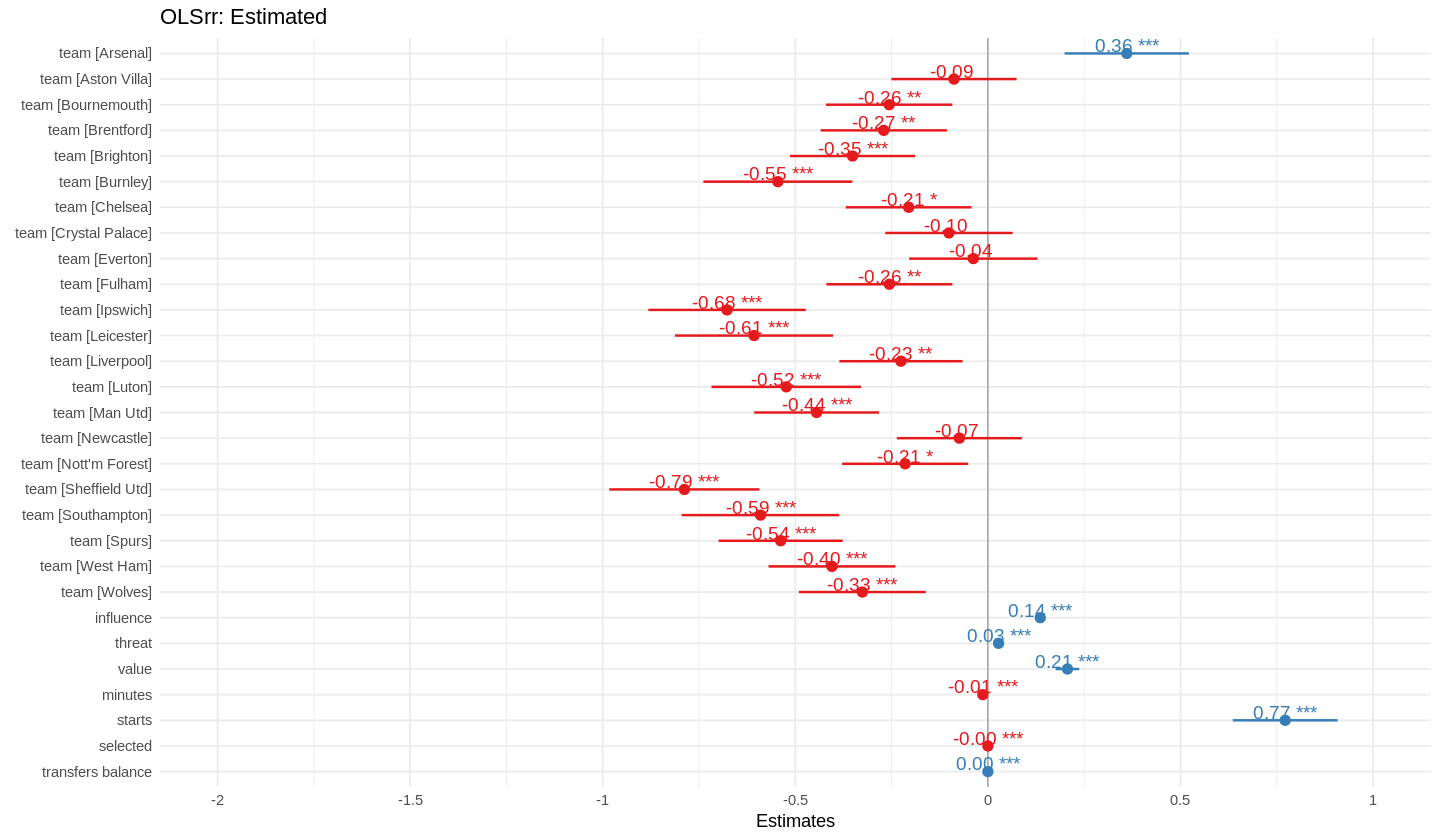

In [44]:
install.packages("gridExtra")  # (Run once) For arranging multiple plots
library(gridExtra)  # Load for grid-based plot arrangement

install.packages("sjPlot")  # (Run once) For plotting model summaries
library(sjPlot)  # Load for visualizing regression results

p1 <- plot_model(ols_all_olsrr,           # Use the model selected via MuMIn::dredge
                 type = "est",             # Plot unstandardized coefficient estimates
                 show.values = TRUE,       # Show the coefficient values next to the bars
                 value.offset = 0.3,       # Offset distance for the displayed values
                 title = "OLSrr: Estimated",  # Title for the plot
                 vline.color = "gray50") +    # Color of the vertical zero reference line
  theme_minimal()  # Apply a clean minimal theme

# Optional standardized version (commented out)
# p2 <- plot_model(ols_fwd_dredge,
#                  type = "std",           # Plot standardized coefficients (beta)
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLSrr: Standardized",
#                  vline.color = "gray50") +
#   theme_minimal()

grid.arrange(p1, ncol = 1)  # Display the plot(s) in a grid layout (here: just p1 in 1 column)

This generates a visual summary of your regression coefficients, making it easier to interpret direction, size, and confidence intervals at a glance.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


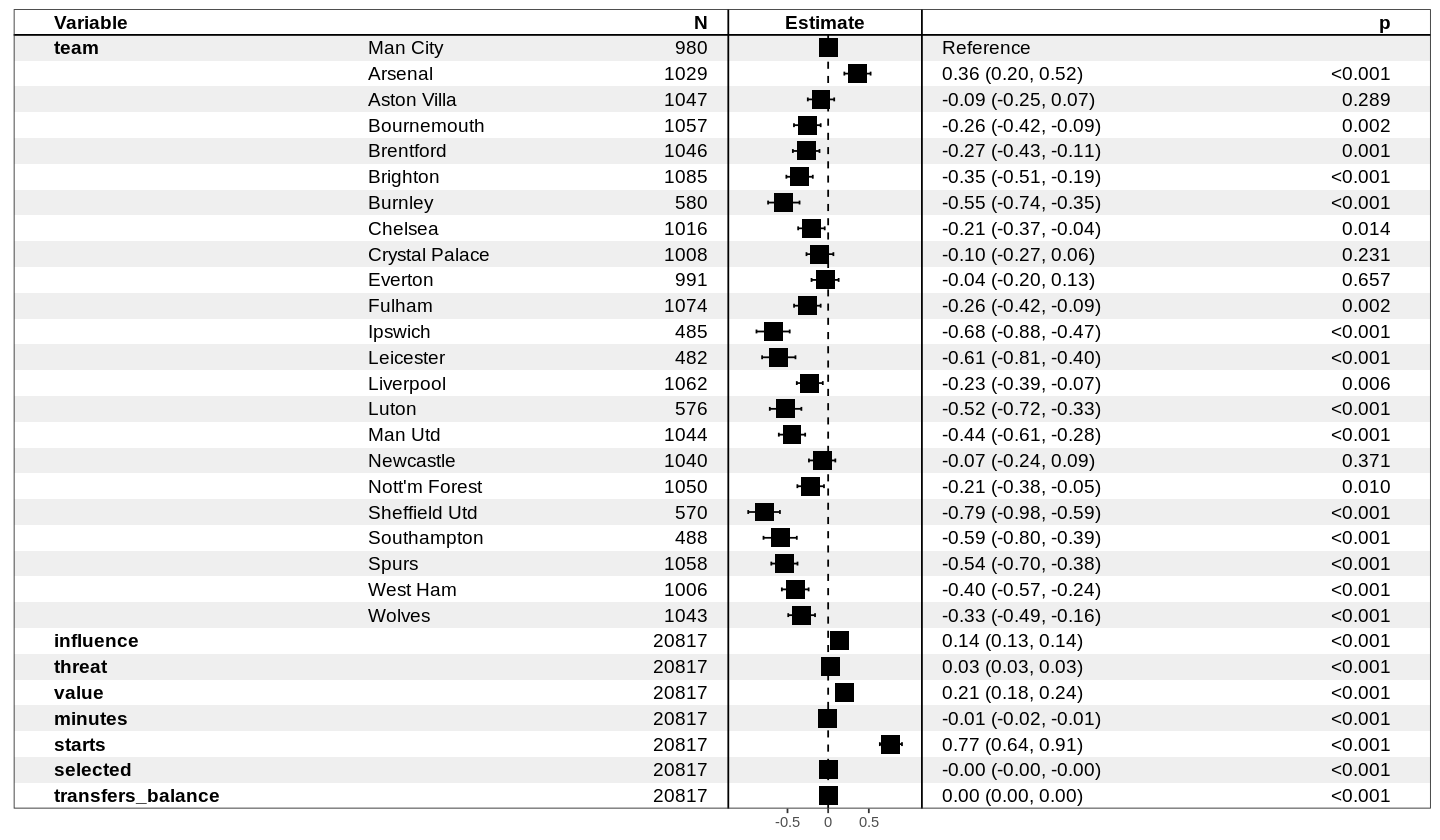

In [45]:
install.packages("forestmodel")  # (Run once) Install the 'forestmodel' package for forest-style coefficient plots

library(forestmodel)  # Load the package

forest_model(
  ols_all_olsrr,  # Use the final OLS model selected via MuMIn::dredge
  theme = theme_forest(),  # Apply a clean, publication-ready forest plot theme
  format_options = forest_model_format_options(text_size = 4)  # Adjust font size (smaller for compact display)
)

This creates a forest plot showing:
- Coefficient estimates
- 95% confidence intervals
- Significance visually (whether CI crosses zero)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



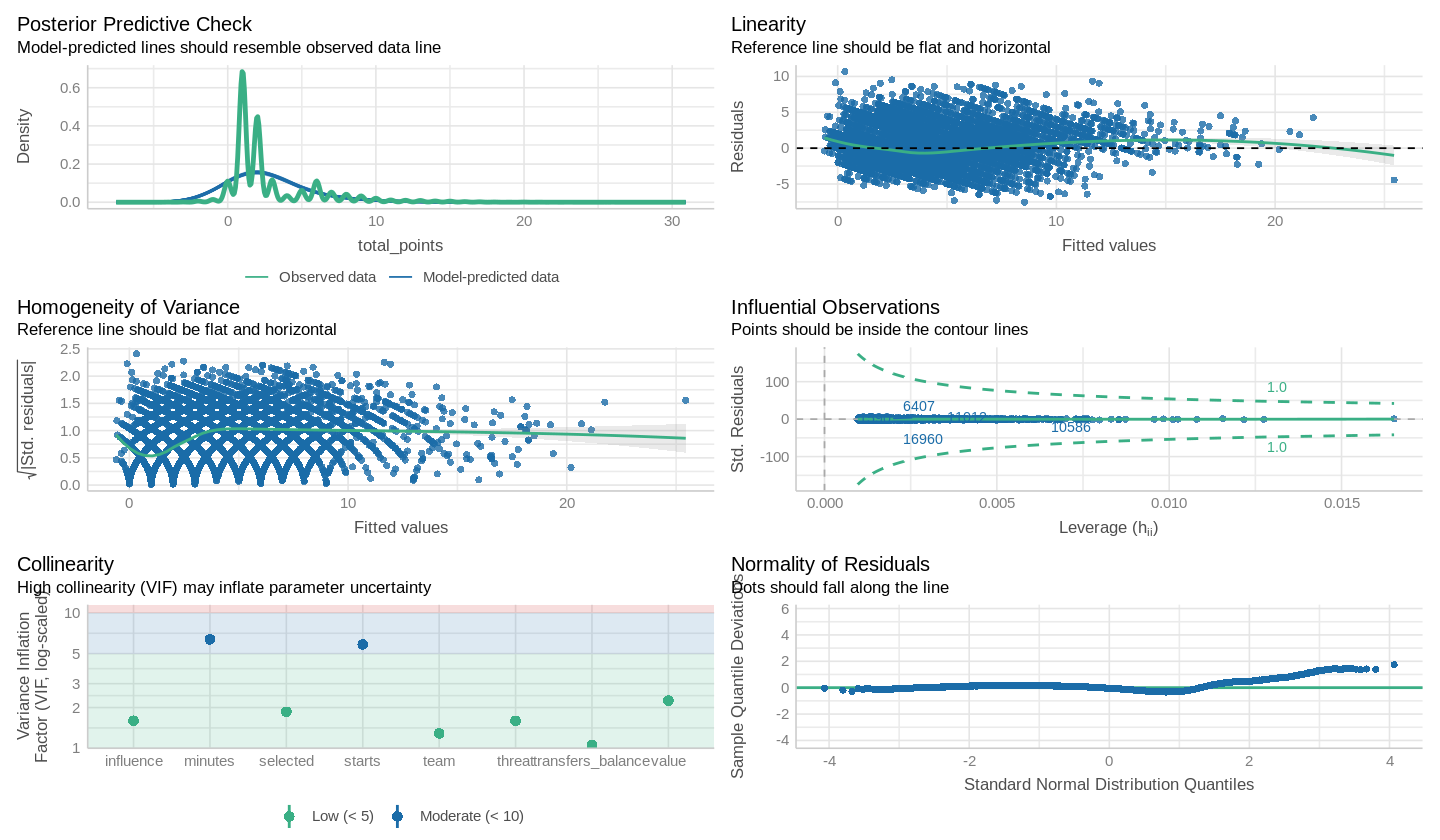

In [46]:
install.packages("see")  # (Run once) Install 'see' for plotting model diagnostics

library(performance)  # Load for model checking tools (residuals, multicollinearity, etc.)
library(see)          # Load for visualizing performance checks

check_model(ols_all_olsrr)
# Automatically generates a panel of diagnostic plots:
# Residuals vs Fitted
# Normal Q-Q
# Scale-Location
# Cook’s Distance
# Leverage
# Multicollinearity (VIF)

# Great for quickly checking:
# - Linearity
# - Homoscedasticity
# - Influential observations
# - Normality of residuals
# - Multicollinearity

**A simple guide to interpreting the plots from `check_model()` in plain English:**

***Residuals vs Fitted***

> What to look for: Points should be randomly scattered around the horizontal line (y = 0).
> If you see a pattern (curve or funnel):
- Your model may have non-linearity or heteroskedasticity.
- Consider transforming variables or using a different model.


***Normal Q-Q (Quantile–Quantile Plot)***

> What to look for: Points should follow the diagonal line.
> If points deviate a lot at the ends:
- Your residuals may not be normally distributed.
- Normality matters most for inference (p-values, confidence intervals).

***Scale-Location (Spread–Location Plot)***

> What to look for: Points should be randomly spread with a flat trend.
> If it fans out or has a pattern:
- Your model may suffer from non-constant variance (heteroskedasticity).

***Cook’s Distance***

> What to look for: Most points should be low and similar in height.
- Tall spikes: Indicate influential points — data that heavily affects the model.
- Investigate these — they may be valid outliers or data entry issues.

***Leverage Plot***

> What to look for: Most points should be close to the left.
- Points far to the right: These have high leverage (unusual x-values).
- If also high in Cook’s Distance → potentially problematic outlier.

***Multicollinearity (VIF)***

> What to look for: VIF values should ideally be < 5.
- If VIF > 5–10: Suggests high multicollinearity — predictors may be too correlated.
- Consider removing or combining variables.


 Model Summary:

Call:
lm(formula = total_points ~ team + influence + minutes + selected + 
    starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002

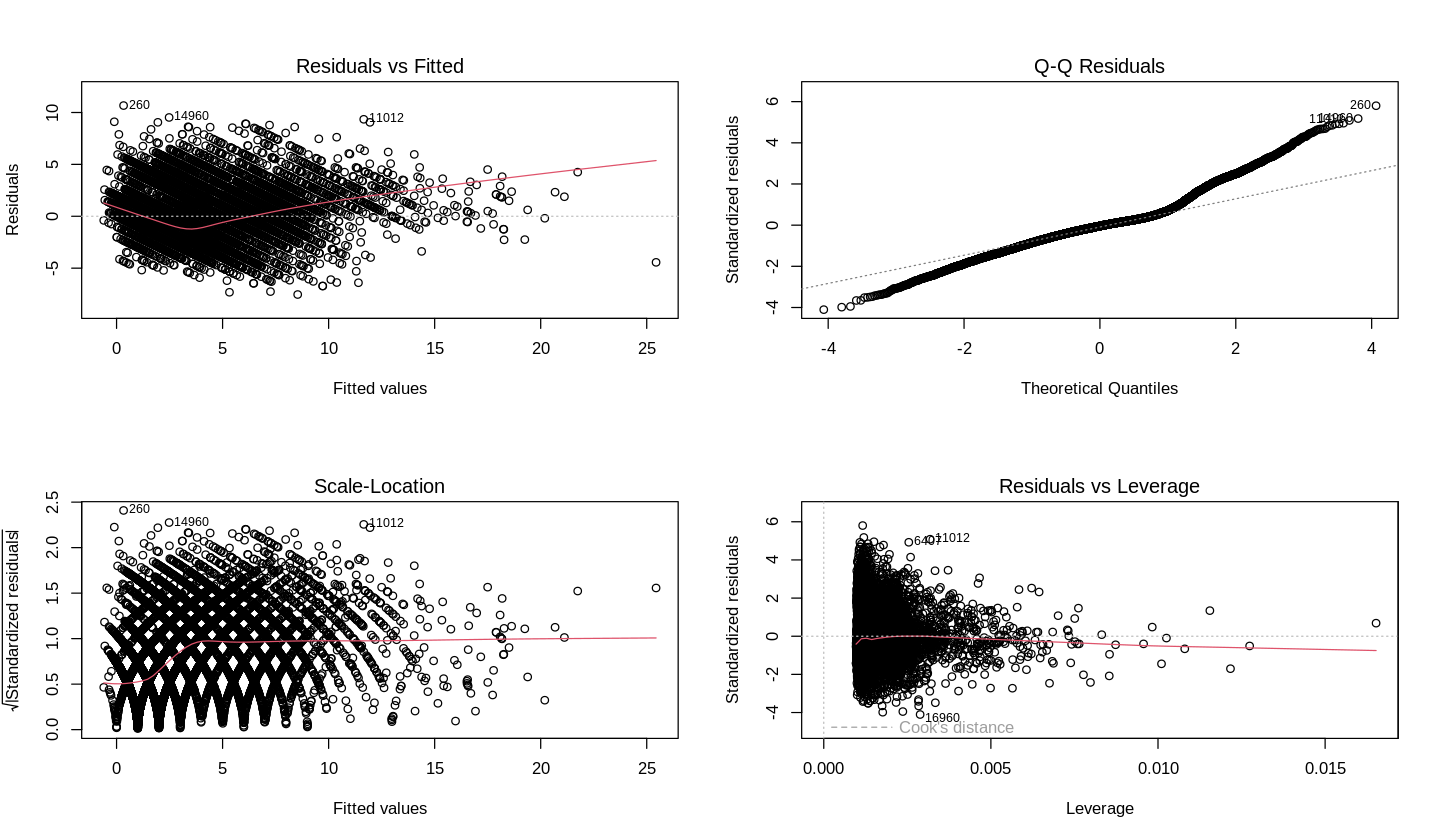

In [39]:
# Required packages
install.packages("car")       # (Run once) Provides tools like VIF and linearHypothesis
install.packages("lmtest")    # (Run once) Provides tests like Breusch–Pagan and Durbin–Watson

library(car)     # Load the 'car' package for regression diagnostics
library(lmtest)  # Load the 'lmtest' package for hypothesis testing and autocorrelation checks

# ---- 1. Model Summary ----
cat("\n Model Summary:\n")
print(summary(ols_all_dredge))  # Display coefficients, R-squared, and p-values for your model

# ---- 2. Multicollinearity Check ----
cat("\n Variance Inflation Factor (VIF):\n")
print(vif(ols_all_dredge))  # Check if any predictors are too correlated (VIF > 5 or 10 is a concern)

# ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
cat("\n Breusch–Pagan Test for Heteroskedasticity:\n")
print(bptest(ols_all_dredge))  # Test whether residual variance is constant
# If p < 0.05 → your model may have heteroskedasticity (bad)

# ---- 4. Autocorrelation Check (Durbin-Watson) ----
cat("\n Durbin–Watson Test for Autocorrelation:\n")
print(dwtest(ols_all_dredge))  # Test if residuals are correlated (esp. in time series)
# DW ~ 2 is ideal. Much < 2 suggests positive autocorrelation

# ---- 5. Normality of Residuals ----
# cat("\n Shapiro-Wilk Test for Normality of Residuals:\n")
# print(shapiro.test(residuals(ols_all_dredge)))  # Test if residuals are normally distributed
# # p > 0.05 means residuals are likely normal (a good thing)

# # ---- 6. Influence and Outlier Detection ----
# cat("\n Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(ols_fwd_dredge)        # Measure how much each observation influences the model
# n <- length(cooks_d)                             # Get the number of observations
# influential_obs <- which(cooks_d > (4 / n))      # Flag observations with high influence
# print(influential_obs)                           # Show their row numbers

# # ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
# team_vars <- grep("^team", names(coef(ols_fwd_dredge)), value = TRUE)  # Find all team dummy variables
# cat("\n Joint Significance Test for All Team Variables:\n")
# print(linearHypothesis(ols_fwd_dredge, team_vars))  # Test if all team effects = 0 at once

# ---- 8. Residual Plots (Optional) ----
par(mfrow = c(2, 2))     # Arrange 4 plots in one 2x2 layout
plot(ols_all_dredge)     # Generate diagnostic plots: residuals, Q-Q, leverage, etc.
par(mfrow = c(1, 1))     # Reset to default plotting layout

In [47]:
vif_stepwise <- function(model, thresh = 5, trace = TRUE) {
  require(car)

  vifs <- vif(model)

  # Convert GVIF to standard VIF when dealing with factors (e.g. team)
  if (is.matrix(vifs)) {
    gvif_adj <- vifs[, "GVIF^(1/(2*Df))"]
    vifs <- gvif_adj
  }

  while (any(vifs > thresh)) {
    var_to_drop <- names(which.max(vifs))

    if (trace) {
      cat("Dropping:", var_to_drop, "| VIF =", max(vifs), "\n")
    }

    fmla <- formula(model)
    fmla <- update(fmla, paste(". ~ . -", var_to_drop))

    model <- lm(fmla, data = model$model)
    vifs <- vif(model)

    # Again, convert GVIF to comparable VIF values
    if (is.matrix(vifs)) {
      gvif_adj <- vifs[, "GVIF^(1/(2*Df))"]
      vifs <- gvif_adj
    }
  }

  return(model)
}

What this function does:
- Automatically removes the most collinear variable one at a time (based on highest VIF).
- Stops when all remaining VIFs are below the given threshold (default = 5).
- Prints progress if trace = TRUE.

In [48]:
# Start with full model (commented out here — assumed already defined)
# ols_fwd_dredge <- lm(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03)

# Run VIF-guided backward selection
ols_all_treated <- vif_stepwise(ols_all_dredge, thresh = 5)
# This automatically drops predictors one by one if their VIF > 5,
# reducing multicollinearity from the model

# Review the refined model
summary(ols_all_treated)
# Shows the final model after removing collinear predictors:
# includes coefficients, significance, and fit metrics


Call:
lm(formula = total_points ~ team + influence + minutes + selected + 
    starts + threat + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrentford      -2.704e-01  8.358e-02  -3.235 0.001218 ** 
teamBrighton       -3.514e-01  8.288e-02  -4.239 2.25e-05 ***
teamBurnley        -5.453e-01  9.868e-02  -5.525 3.33e-08 ***
teamChelsea        -2.056e-01  8.331e-02  -2.468 0.013585 *  
teamCrystal Palace -1.011e-01  8.439e-02  -1.198 0.230828    
teamEverton        -3.773e-02  8.497e-02  -0.444 0.657018    
teamFulham         -2.558e-01  8.345e-02  -3.065 0.002180 ** 
teamIpswi

In [50]:
library(car)
library(tibble)
library(dplyr)

# Calculate VIF and convert to tidy tibble
vif_result <- vif(ols_all_treated)

if (is.matrix(vif_result)) {
  # Handle GVIF matrix (factors)
  vif_table <- as.data.frame(vif_result) %>%
    rownames_to_column(var = "Variable") %>%
    mutate(VIF = `GVIF^(1/(2*Df))`) %>%
    select(Variable, VIF)
} else {
  # Handle named numeric vector (non-factor variables)
  vif_table <- tibble(
    Variable = names(vif_result),
    VIF = as.numeric(vif_result)
  )
}

# Sort descending by VIF
vif_table <- vif_table %>%
  arrange(desc(VIF))

# Print
print(vif_table)


           Variable      VIF
1           minutes 2.524187
2            starts 2.418223
3             value 1.498449
4          selected 1.363102
5         influence 1.262940
6            threat 1.261995
7 transfers_balance 1.030034
8              team 1.005784


In [53]:
# install.packages("estimatr")  # (Run once) For robust standard errors
library(estimatr)  # Load if using lm_robust

# install.packages("modelsummary")  # (Optional) For clean regression tables
# library(modelsummary)

# (Optional robust version with heteroskedasticity-consistent standard errors)
# ols_gk_trtd <- lm_robust(
#     total_points ~ assists + creativity + expected_goals +
#     goals_scored + own_goals + penalties_missed +
#     selected + starts + threat + value, data = db03, se_type = "stata")

# Standard OLS regression using final, low-multicollinearity predictors
ols_all_trtd <- lm(
  total_points ~ minutes + starts + value + selected + influence + threat +
  transfers_balance + team, data = db03)

summary(ols_all_trtd)
# Print model summary: coefficients, p-values, R², and diagnostic info

# Optional: create a clean, publication-style summary table
# modelsummary(ols_gk_trtd, stars = TRUE)


Call:
lm(formula = total_points ~ minutes + starts + value + selected + 
    influence + threat + transfers_balance + team, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5412 -1.0167 -0.0733  0.6826 10.6691 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.767e-02  1.117e-01  -0.695 0.486796    
minutes            -1.321e-02  1.016e-03 -12.993  < 2e-16 ***
starts              7.718e-01  6.940e-02  11.121  < 2e-16 ***
value               2.066e-01  1.566e-02  13.187  < 2e-16 ***
selected           -8.895e-08  1.873e-08  -4.749 2.06e-06 ***
influence           1.360e-01  1.049e-03 129.655  < 2e-16 ***
threat              2.765e-02  1.088e-03  25.406  < 2e-16 ***
transfers_balance   5.068e-07  1.348e-07   3.758 0.000172 ***
teamArsenal         3.605e-01  8.231e-02   4.379 1.20e-05 ***
teamAston Villa    -8.795e-02  8.287e-02  -1.061 0.288558    
teamBournemouth    -2.563e-01  8.375e-02  -3.060 0.002213 ** 
teamBrent

In [54]:
library(forestmodel)  # Load the package to create forest plots for regression models

# Create forest plot object from final OLS model
p_forest <- forest_model(
  ols_all_trtd,                         # Use the VIF-treated regression model
  theme = theme_forest(),              # Apply a clean forest-style theme
  format_options = forest_model_format_options(text_size = 4)  # Set small font for compact display
)

# Save the plot to a PDF file
pdf("/content/drive/MyDrive/02fpl/forest_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device (A4 landscape size) to save the plot

# Arrange and render the plot
grid.arrange(
  grobs = list(p_forest),  # Put the forest plot in a list (can add more plots later)
  ncol = 1                  # Arrange in 1 column (i.e., single full-page plot)
)

dev.off()  # Close the PDF device and finalize the file

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


pdf 
  2

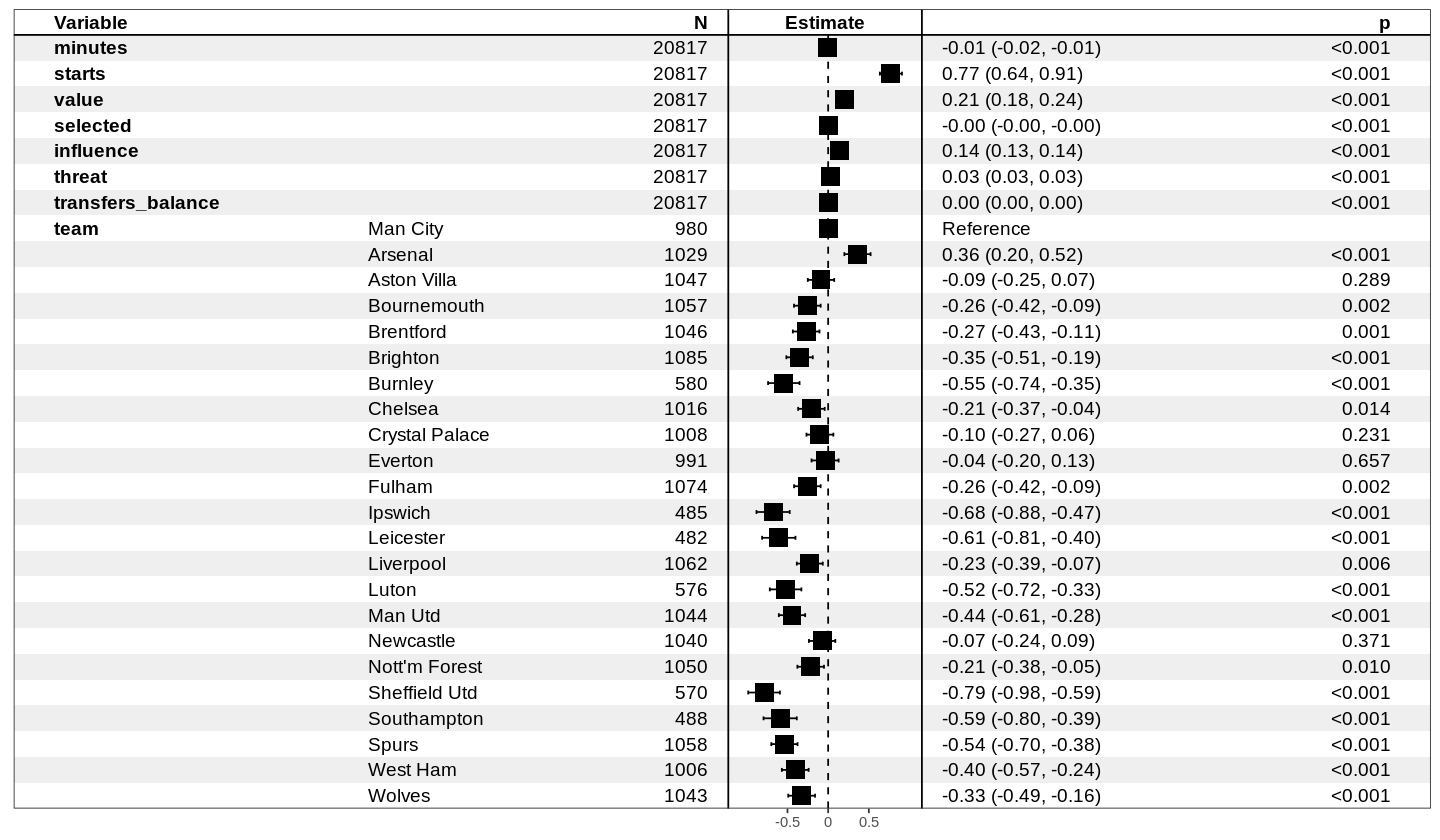

In [55]:
p_forest

In [56]:
# install.packages("gridExtra")  # (Run once) For arranging plots
library(gridExtra)  # Load to use grid.arrange()

# install.packages("sjPlot")  # (Run once) For visualizing regression models
library(sjPlot)  # Load to use plot_model()

# Create a standardized coefficient plot
p_sj <- plot_model(
  ols_all_trtd,                    # Use the final VIF-treated OLS model
  type = "std",                    # Plot standardized beta coefficients
  show.values = TRUE,              # Display coefficient values on the plot
  value.offset = 0.3,              # Move the text slightly away from the bars
  title = "OLSrr: Standardized",  # Title for the plot
  vline.color = "gray50"           # Vertical reference line at zero
) +
  theme_minimal()                  # Apply a clean theme

# Save the plot as a landscape A4 PDF
pdf("/content/drive/MyDrive/02fpl/sj_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device to write the plot

# Render the plot into the PDF
grid.arrange(
  grobs = list(p_sj),  # Place the plot into a list of grobs (plot objects)
  ncol = 1              # Arrange in 1 column
)

dev.off()  # Finalize and close the PDF device

pdf 
  2

In [58]:
# install.packages("stargazer")  # (Run once) Install stargazer for beautiful regression tables
library(stargazer)  # Load stargazer for formatting regression output

# Export a side-by-side regression table for 3 models
stargazer(
  # ols_gk_lasso,                # Model from stepwise selection
  ols_all_olsrr,                  # Model from AICc selection via MuMIn::dredge
  ols_all_trtd,                    # Final model after VIF filtering
  type = "text",                   # Output format: plain text (other options: "html", "latex")
  out = "/content/drive/MyDrive/02fpl/ols_all_estimatr.txt"  # Save output to this text file
)


                                     Dependent variable:     
                                 ----------------------------
                                         total_points        
                                      (1)            (2)     
-------------------------------------------------------------
teamArsenal                         0.360***      0.360***   
                                    (0.082)        (0.082)   
                                                             
teamAston Villa                      -0.088        -0.088    
                                    (0.083)        (0.083)   
                                                             
teamBournemouth                    -0.256***      -0.256***  
                                    (0.084)        (0.084)   
                                                             
teamBrentford                      -0.270***      -0.270***  
                                    (0.084)        (0.084)   
       